# Projeto Final - Fifa 18 More Complete Player Dataset

INTEGRANTES:

João Guilherme de Araújo

Victor Demetrio Morales Habib

Victor Jurdi Gomes

In [208]:
#importar todas as bibliotecas necessárias

import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math as math
from scipy import stats
import statsmodels.api as sm
from scipy.stats import uniform, expon, norm, probplot, percentileofscore, t

In [79]:
#rodar o dataset

fifa = pd.read_csv("CompleteDataset.csv")

C:\Users\VICTOR HABIB\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [80]:
fifa.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
#remover itens que não serão úteis na análise

fifa_limpo = fifa.drop(columns=['Photo', 'Flag', 'Club Logo'])

In [157]:
def troca(preco):
    
    for valor in fifa.Value:
        preco_certo = []
        for letra in valor:
            if letra == "M":
                valor_novo = valor*1000000
            elif letra == "K":
                valor_novo = valor*1000
        lista_valores.append(valor_novo)

    preco = preco.replace('€', '')
    preco_certo.append(preco)
    return preco

NameError: name 'preco_certo' is not defined

In [156]:
for valor in fifa.Value:
    lista_valores = []
    valor_novo = 0
    for letra in valor:
        if letra == "M":
            valor_novo = valor*1000000
        elif letra == "K":
            valor_novo = valor*1000
        lista_valores.append(valor_novo)

print(lista_valores[0])
            

KeyboardInterrupt: 

Distribuição das idades dos jogadores

In [82]:
#dados básicos de idade

fifa_limpo.Age.describe()

count    17981.000000
mean        25.144541
std          4.614272
min         16.000000
25%         21.000000
50%         25.000000
75%         28.000000
max         47.000000
Name: Age, dtype: float64

In [119]:
#média e desvio padrão mais precisos

media, dp = norm.fit(fifa.Age)

print('Média: {0}'.format(media))
print('Desvio Padrão: {0}'.format(dp))

Média: 25.144541460430453
Desvio Padrão: 4.614144033551294


In [121]:
#idade mínima e máxima

idade_min = 16
idade_max = 47

print('Idade do jogador mais jovem: {0} anos'.format(idade_min))
print('Idade do jogador mais velho: {0} anos'.format(idade_max))

Idade do jogador mais jovem: 16 anos
Idade do jogador mais velho: 47 anos


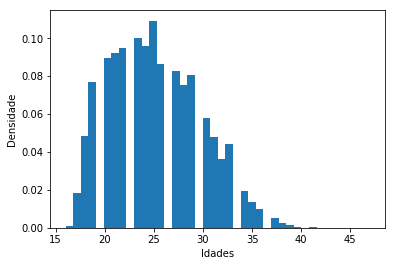

In [134]:
idades=[]
for dados_idade in fifa.Age:
    idades.append(dados_idade)
plt.hist(idades, density=True, bins= 40);
plt.ylabel('Densidade');
plt.xlabel('Idades');


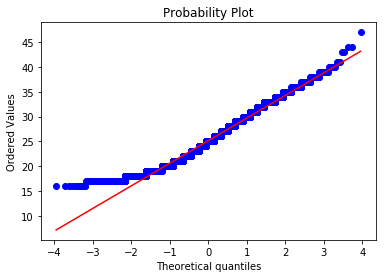

In [125]:
#Verificar graficamente se a distribuição normal é um modelo adequado para as idades dos jogadores

stats.probplot(idades, dist='norm', plot=plt);

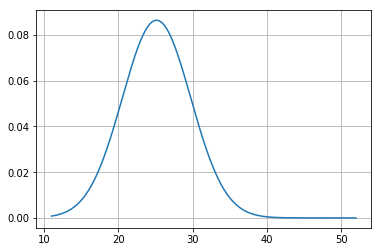

In [117]:
x = np.linspace(idade_min-5, idade_max+5, 1000)
y = norm.pdf(x, loc=media , scale=dp)
plt.plot(x, y)
plt.grid(True)
plt.show()



Percebe-se que a distribuição normal pode ser considerada aceitável como modelo para as idades dos jogadores, pois grande parte dos pontos se encontram sobre a linha vermelha (diagonal). Entretanto não pode-se afirmar que é uma distribuição perfeita.

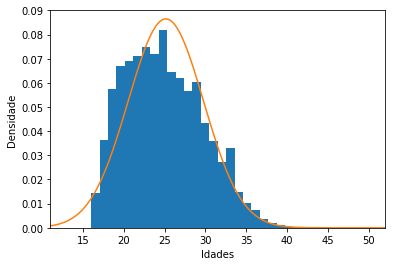

In [159]:
#plotar

plt.hist(idades, density=True, bins= 30)
plt.axis([idade_min-5, idade_max+5, 0, 0.09])
plt.ylabel('Densidade')
plt.xlabel('Idades')
plt.plot(x, y)
plt.show()


# Habilidades x Habilidades

In [184]:
player_attributes = pd.read_csv('PlayerAttributeData.csv')

C:\Users\VICTOR HABIB\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (11,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [185]:
player_attributes.head()

,Unnamed: 0,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,0,89,63,89,63,93,95,85,81,91,...,96,83,94,23,91,92,31,80,85,88
1,1,92,48,90,95,95,96,77,89,97,...,95,88,85,26,87,73,28,59,90,85
2,2,94,56,96,82,95,92,75,81,96,...,88,81,80,33,90,78,24,53,80,83
3,3,88,78,86,60,91,83,77,86,86,...,93,83,87,38,77,89,45,80,84,88
4,4,58,29,52,35,48,70,15,14,30,...,85,55,25,11,61,44,10,83,70,11


In [186]:
player_attributes_limpo = player_attributes.drop(columns=['Unnamed: 0', 'ID'])

In [187]:
player_attributes_limpo.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,89,63,89,63,93,95,85,81,91,94,...,96,83,94,23,91,92,31,80,85,88
1,92,48,90,95,95,96,77,89,97,95,...,95,88,85,26,87,73,28,59,90,85
2,94,56,96,82,95,92,75,81,96,89,...,88,81,80,33,90,78,24,53,80,83
3,88,78,86,60,91,83,77,86,86,94,...,93,83,87,38,77,89,45,80,84,88
4,58,29,52,35,48,70,15,14,30,13,...,85,55,25,11,61,44,10,83,70,11


In [192]:
corr = player_attributes_limpo.corr()
corr

""


In [204]:
# calculate the correlation matrix
corr = player_attributes_limpo.corr()

# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)


ValueError: zero-size array to reduction operation minimum which has no identity

In [181]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Unnamed: 0,ID
Unnamed: 0,1,0.43
ID,0.43,1


C:\Users\VICTOR HABIB\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.5, right=-0.5
  'left=%s, right=%s') % (left, right))
C:\Users\VICTOR HABIB\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.5, top=-0.5
  'bottom=%s, top=%s') % (bottom, top))


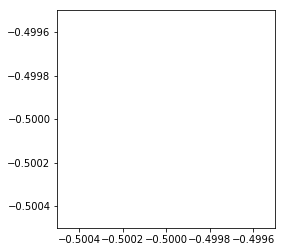

In [205]:
corr = player_attributes_limpo.corr()

plt.imshow(corr,cmap='hot',interpolation='nearest')

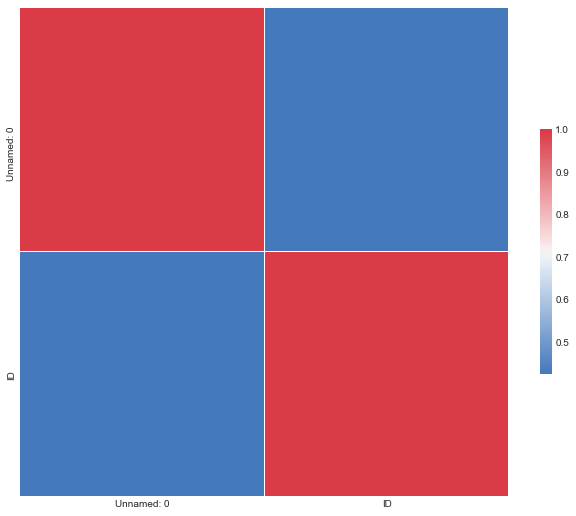

In [207]:
# A list with your data slightly edited
l = [1.0,0.00279981,0.95173379,0.02486161,-0.00324926,-0.00432099,
0.00279981,1.0,0.17728303,0.64425774,0.30735071,0.37379443,
0.95173379,0.17728303,1.0,0.27072266,0.02549031,0.03324756,
0.02486161,0.64425774,0.27072266,1.0,0.18336236,0.18913512,
-0.00324926,0.30735071,0.02549031,0.18336236,1.0,0.77678274,
-0.00432099,0.37379443,0.03324756,0.18913512,0.77678274,1.00]

# Split list
n = 6
data = [l[i:i + n] for i in range(0, len(l), n)]

# A dataframe
df = pd.DataFrame(player_attributes)

def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(df, dropDuplicates = False)

# Overall x Value

In [196]:
scatter = fifa.plot.scatter(x= "Overall", y = "Value")
scatter

ValueError: scatter requires y column to be numeric

# potencial x idade

In [203]:
x = fifa.Age
y = fifa.Potential
fifa.plot.scatter(x, y)

KeyError: '[32 30 25 ... 17 18 18] not in index'